## Bottom and lateral boundary layers in the base case run

Which bottom and lateral boundary conditions should I be using? Drag and free-slip? No-Slip? Am I reloving them? Where?

In [1]:
import cmocean as cmo
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import xarray as xr

import canyon_tools.readout_tools as rout

In [2]:
# Seaborn specs.
sns.set_context('notebook')
sns.set_style('white')

In [3]:
# grid files
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid = xr.open_dataset(grid_file)

# State files base case adn high diffusivity
state_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc'
state_base = xr.open_dataset(state_file)
state_fileKv = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run63/stateGlob.nc'
state_highKv = xr.open_dataset(state_fileKv)


## Bottom boundary layers

Look at boundary layers on stations on shelf and slope upstream, upstream near the canyon and downstream near the canyon for the base case, high diffusivity case, and high stratification.

In [4]:
# Coords of stations to look at BBL on shelf and slope

xs = [40,110,250,40,110,250]
ys = [245,245,245,190,190,190]


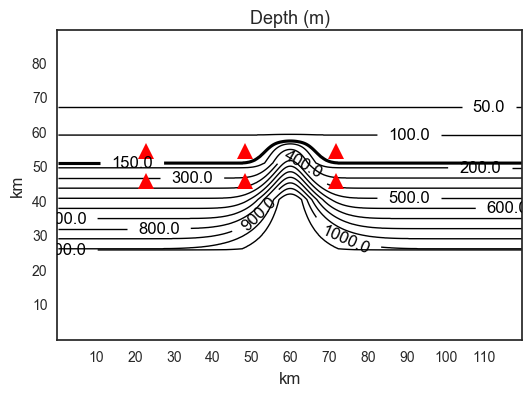

In [5]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

levels = [50,100,150]+[x for x in range(200,1200,100)]

CS = ax.contour(grid.XC,grid.YC,grid.Depth,levels,colors='k',linewidths=[1,1,2.25,1,1,1,1,1,1,1,1,1,1] )
plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)

ax.plot(grid.X[xs],grid.Y[ys],'r^', markersize=12)

plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=12)
plt.ylabel('km',fontsize=12)

plt.title('Depth (m)',fontsize=13)

In [6]:
# Get u vel at each station
Ust0 = state_base.U.isel(Xp1=xs[0],Y=ys[0])
Ust1 = state_base.U.isel(Xp1=xs[1],Y=ys[1])
Ust2 = state_base.U.isel(Xp1=xs[2],Y=ys[2])
Ust3 = state_base.U.isel(Xp1=xs[3],Y=ys[3])
Ust4 = state_base.U.isel(Xp1=xs[4],Y=ys[4])
Ust5 = state_base.U.isel(Xp1=xs[5],Y=ys[5])

#MaskW = rout.getMask(grid_file,'HFacW')

### Base case

<function matplotlib.pyplot.show>

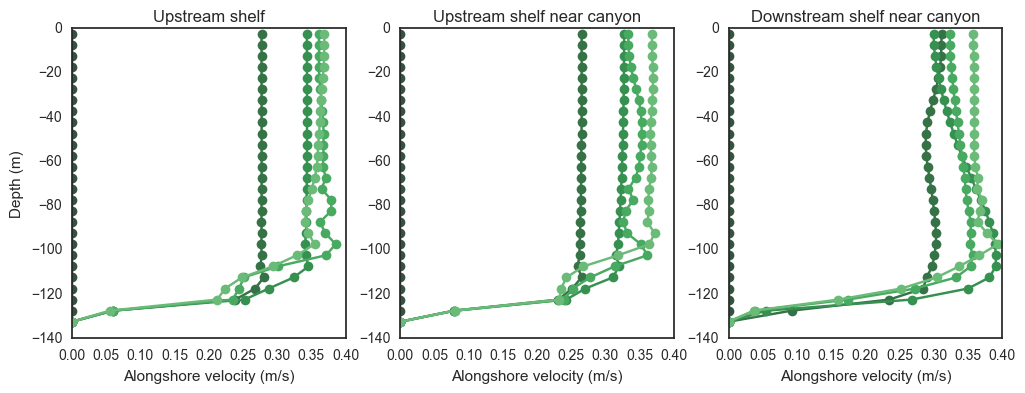

In [8]:
fig,ax = plt.subplots(1,3,figsize=(12,4))

sns.set_palette('Greens_d',6)
for tt in [0,4,8,12,16]:
    #U1mask=np.ma.array(Ust1.isel(T=tt),mask=MaskW[:,xs[0],ys[0]])
    ax[0].plot(Ust0.isel(T=tt,Z=slice(0,27)),grid.Z.isel(Z=slice(0,27)),'o-')
    ax[1].plot(Ust1.isel(T=tt,Z=slice(0,27)),grid.Z.isel(Z=slice(0,27)),'o-')
    ax[2].plot(Ust2.isel(T=tt,Z=slice(0,27)),grid.Z.isel(Z=slice(0,27)),'o-')
    # titles
    ax[0].set_title('Upstream shelf')
    ax[1].set_title('Upstream shelf near canyon')
    ax[2].set_title('Downstream shelf near canyon')
    # labels
    ax[0].set_ylabel('Depth (m)')
    ax[0].set_xlabel('Alongshore velocity (m/s)')
    ax[1].set_xlabel('Alongshore velocity (m/s)')
    ax[2].set_xlabel('Alongshore velocity (m/s)')    
plt.show

<function matplotlib.pyplot.show>

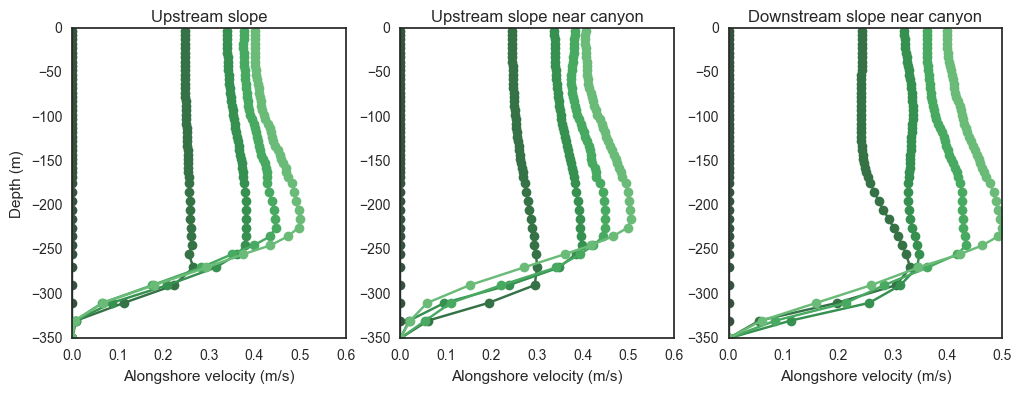

In [9]:
fig,ax = plt.subplots(1,3,figsize=(12,4))

sns.set_palette('Greens_d',5)
for tt in range(0,19,4):
    ax[0].plot(Ust3.isel(T=tt,Z=slice(0,48)),grid.Z.isel(Z=slice(0,48)),'o-')
    ax[1].plot(Ust4.isel(T=tt,Z=slice(0,48)),grid.Z.isel(Z=slice(0,48)),'o-')
    ax[2].plot(Ust5.isel(T=tt,Z=slice(0,48)),grid.Z.isel(Z=slice(0,48)),'o-')
    # titles
    ax[0].set_title('Upstream slope')
    ax[1].set_title('Upstream slope near canyon')
    ax[2].set_title('Downstream slope near canyon')
    # labels
    ax[0].set_ylabel('Depth (m)')
    ax[0].set_xlabel('Alongshore velocity (m/s)')
    ax[1].set_xlabel('Alongshore velocity (m/s)')
    ax[2].set_xlabel('Alongshore velocity (m/s)')
        
plt.show

Wow, these are a lot worse than the ones I checked before for runs 03, 05, 06 in CNTDIFF. In those runs I changed the bottom drag quadratic from 0.002 to 0.004 and to 0.001. The difference between these runs and the base case (run38) is that I reduced the viscosities ($A_h=A_v=10^{-2}$) to match the diffusivity in the base case ($A_h=A_v=10^{-5}$). I also deleted a bunch of parameters like ViscAhgridMax, etc. 

I will check what is the difference between some runs where viscosity is higher than in the base case:

|CNTDIFF run|   Viscosity (m$^2$s$^{-1}$)  | Diffusivity $\kappa_v$ (m$^2$s$^{-1}$) |
|:---------:|:----------------------------:|:--------------------------------------:|
| 36        |   10$^{-3}$                  | 10$^{-3}$                              |
| 57        |   10$^{-3}$                  | 10$^{-5}$                              |
| 63        |   10$^{-5}$                  | 10$^{-3}$                              |


In [10]:
# state files for runs 36 and 57. We already got run63 above.

state_file36 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run36/stateGlob.nc'
state_36 = xr.open_dataset(state_file36)
state_file57 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run57/stateGlob.nc'
state_57 = xr.open_dataset(state_file57)

In [11]:
def plot_BBL_with_diff(Ubase,U63,U57,U36,z):
    ''' 
    INPUT
       Ubase: xarray, Base case U velocity profile at the desired station. Size (nt,size(z))
       U63: xarray,Run 63 velocity profile
       U57: xarray,Run 57 velocity profile
       U36: xarray,Run 36 velocity profile
       z: xarray, depth array from grid.Z. Same size as velocity profiles
    RETURN 
      handle for ax1'''
    
    gs = gridspec.GridSpec(2, 3,
                           width_ratios=[2,2,1]
                           )
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax3 = plt.subplot(gs[2])
    ax4 = plt.subplot(gs[3])
    ax5 = plt.subplot(gs[4])
    ax6 = plt.subplot(gs[5])

    for tt in [0,4,8,12,16]:

        ax1.plot(Ubase.isel(T=tt),z,'o-')
        ax2.plot(U63.isel(T=tt),z,'o-')
        ax3.plot((Ubase.isel(T=tt)-U63.isel(T=tt))*100.,z,'-')
        ax4.plot(U57.isel(T=tt),z,'o-')
        ax5.plot(U36.isel(T=tt),z,'o-')
        ax6.plot((U57.isel(T=tt)-U36.isel(T=tt))*100.,z,'-')

        ax1.set_title('Low Kv, low Av (base case)')
        ax1.set_ylabel('Depth (m)')
        ax2.set_title('Low Kv, high Av')
        ax3.set_title('Difference')
        ax4.set_title('High Kv, low Av')
        ax4.set_ylabel('Depth (m)')
        ax4.set_xlabel('Alongshore velocity (m/s)')
        ax5.set_title('High Kv, high Av')
        ax5.set_xlabel('Alongshore velocity (m/s)')
        ax6.set_title('Difference')
        ax6.set_xlabel('(10$^{-2}$ m/s)')
    
    return(ax1)


In [12]:
# Load U for upstream stations on slope and shelf

Ust0_36 = state_36.U.isel(Xp1=xs[0],Y=ys[0])
Ust0_57 = state_57.U.isel(Xp1=xs[0],Y=ys[0])
Ust0_63 = state_highKv.U.isel(Xp1=xs[0],Y=ys[0])

Ust3_36 = state_36.U.isel(Xp1=xs[3],Y=ys[3])
Ust3_57 = state_57.U.isel(Xp1=xs[3],Y=ys[3])
Ust3_63 = state_highKv.U.isel(Xp1=xs[3],Y=ys[3])

Lighter blue means later in time. Times are days 0, 2, 4, 6, 8


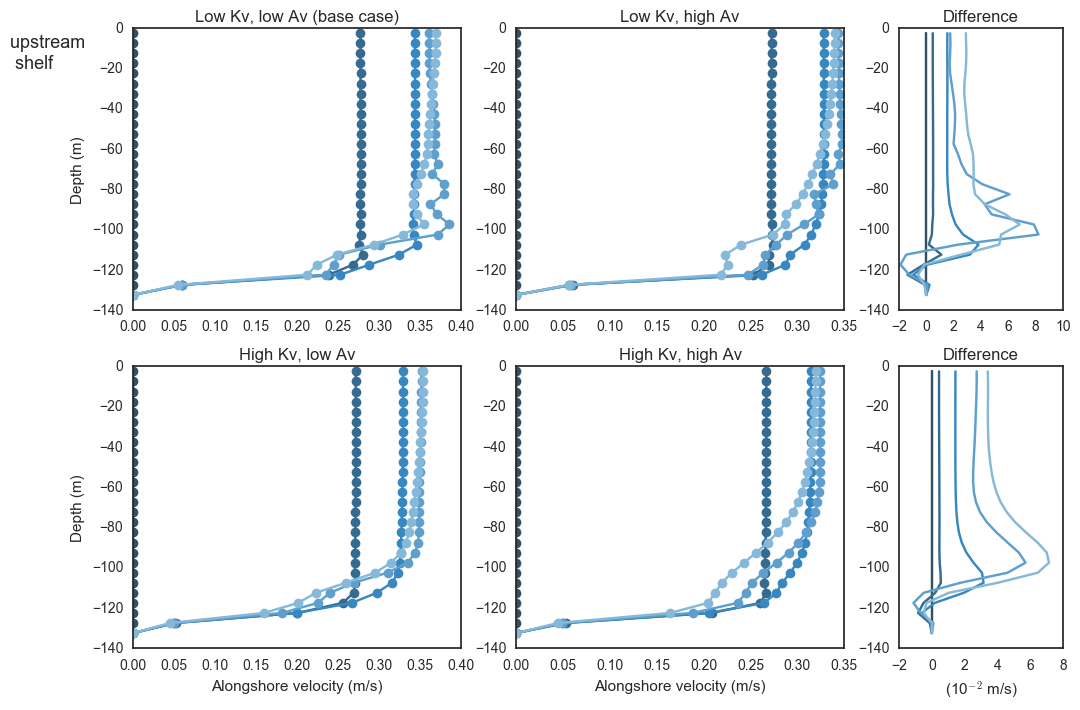

In [13]:
print('Lighter blue means later in time. Times are days 0, 2, 4, 6, 8')

fig = plt.figure(figsize=(12,8))

sns.set_palette('Blues_d',5)

ax1=plot_BBL_with_diff(Ust0.isel(Z=slice(0,27)),
                       Ust0_63.isel(Z=slice(0,27)),
                       Ust0_57.isel(Z=slice(0,27)),
                       Ust0_36.isel(Z=slice(0,27)),
                       grid.Z.isel(Z=slice(0,27)))
    
ax1.text(-0.15, -20, 'upstream \n shelf', fontsize=13)
        
plt.show()

Lighter blue means later in time. Times are days 0, 2, 4, 6, 8


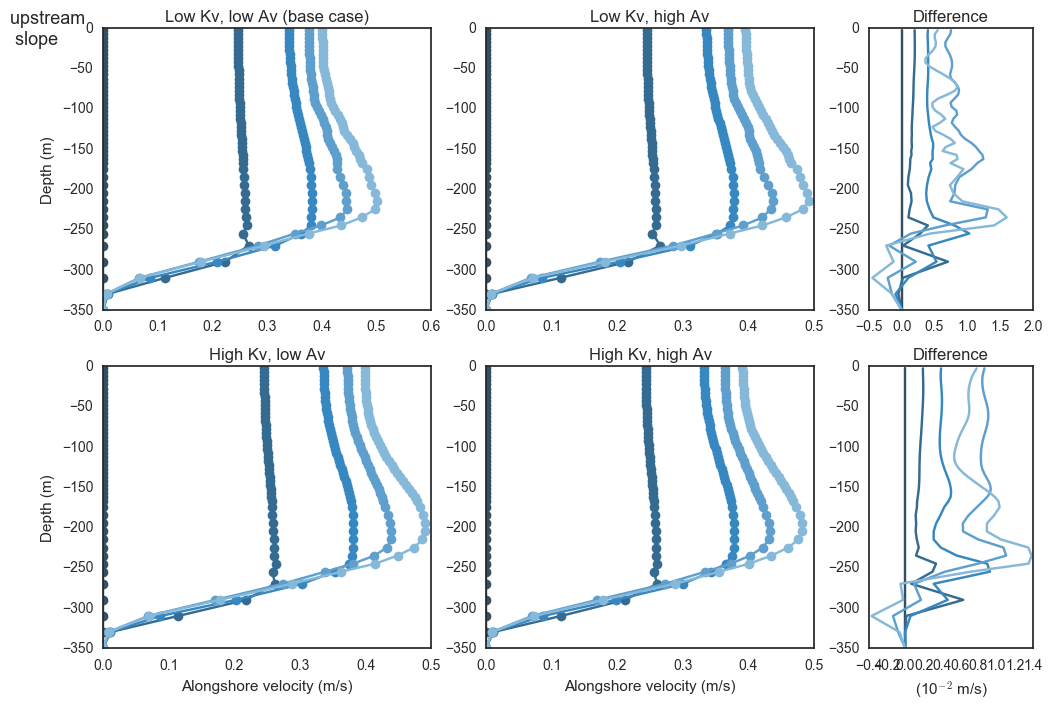

In [14]:
print('Lighter blue means later in time. Times are days 0, 2, 4, 6, 8')
fig = plt.figure(figsize=(12,8))

sns.set_palette('Blues_d',5)

ax1=plot_BBL_with_diff(Ust3.isel(Z=slice(0,48)),
                       Ust3_63.isel(Z=slice(0,48)),
                       Ust3_57.isel(Z=slice(0,48)),
                       Ust3_36.isel(Z=slice(0,48)),
                       grid.Z.isel(Z=slice(0,48)))
    

ax1.text(-0.17, -20, 'upstream \n slope', fontsize=13)
        
plt.show()

In [15]:
# Load U for upstream canyon stations on slope and shelf

Ust1_36 = state_36.U.isel(Xp1=xs[2],Y=ys[2])
Ust1_57 = state_57.U.isel(Xp1=xs[2],Y=ys[2])
Ust1_63 = state_highKv.U.isel(Xp1=xs[2],Y=ys[2])

Ust4_36 = state_36.U.isel(Xp1=xs[5],Y=ys[5])
Ust4_57 = state_57.U.isel(Xp1=xs[5],Y=ys[5])
Ust4_63 = state_highKv.U.isel(Xp1=xs[5],Y=ys[5])

Lighter blue means later in time. Times are days 0, 2, 4, 6, 8


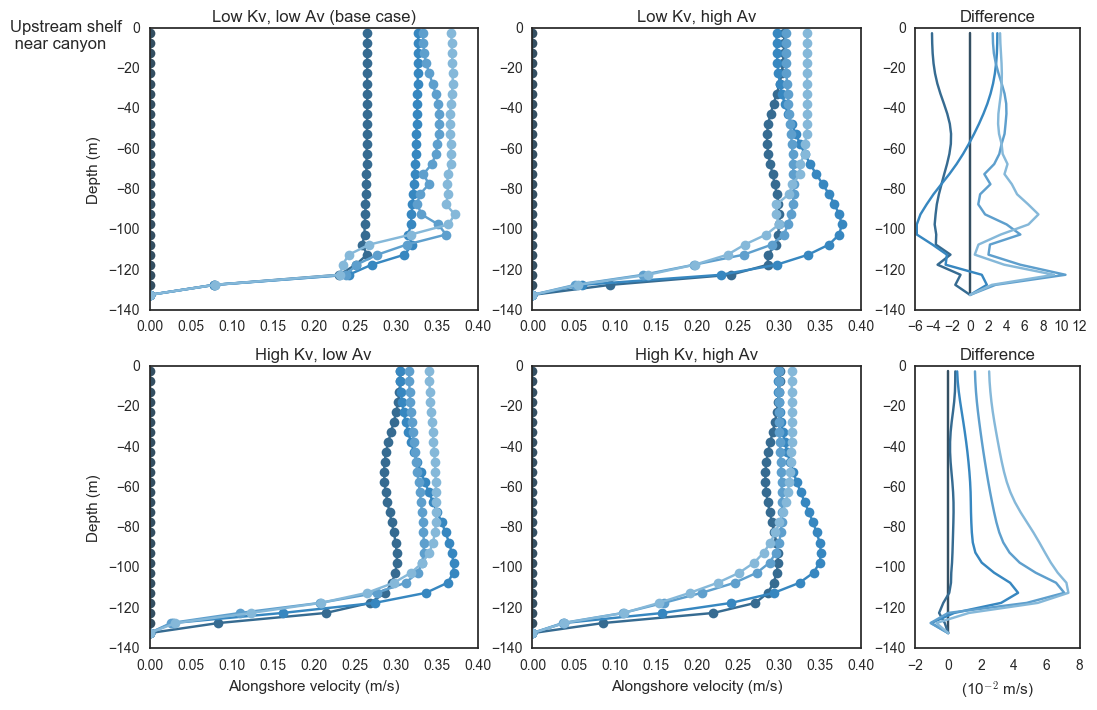

In [16]:
print('Lighter blue means later in time. Times are days 0, 2, 4, 6, 8')
fig = plt.figure(figsize=(12,8))

sns.set_palette('Blues_d',5)

ax1=plot_BBL_with_diff(Ust1.isel(Z=slice(0,27)),
                       Ust1_63.isel(Z=slice(0,27)),
                       Ust1_57.isel(Z=slice(0,27)),
                       Ust1_36.isel(Z=slice(0,27)),
                       grid.Z.isel(Z=slice(0,27)))
       
ax1.text(-0.17, -10, 'Upstream shelf \n near canyon', fontsize=12)
        
plt.show()

Lighter blue means later in time. Times are days 0, 2, 4, 6, 8


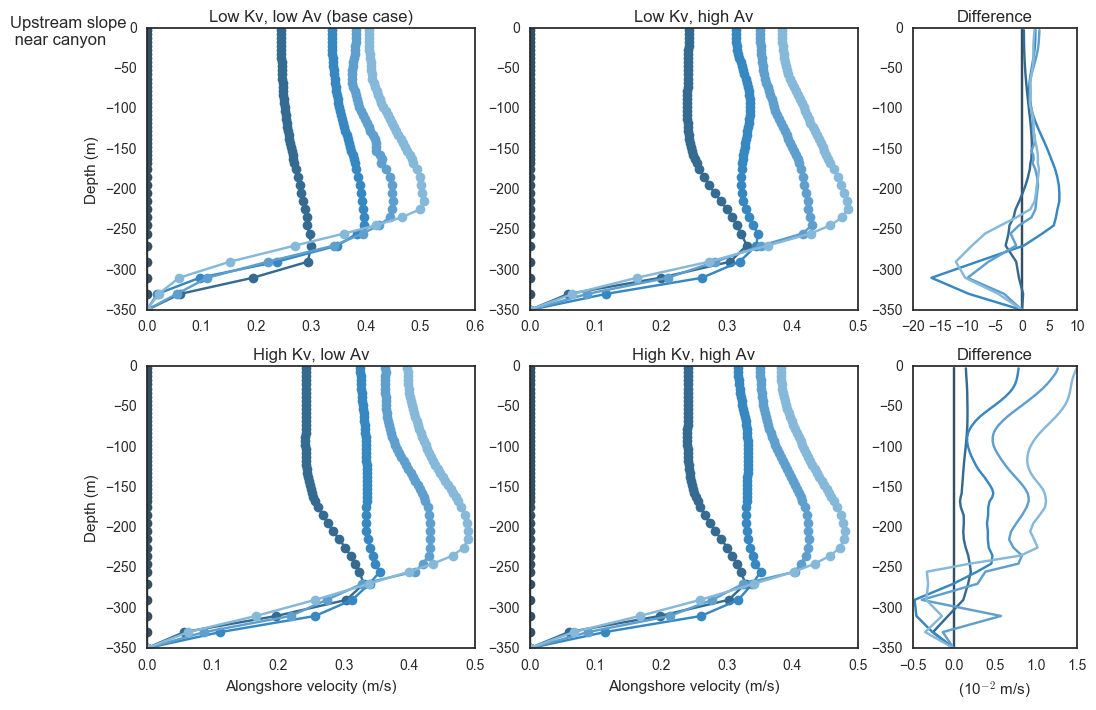

In [17]:
print('Lighter blue means later in time. Times are days 0, 2, 4, 6, 8')
fig = plt.figure(figsize=(12,8))

sns.set_palette('Blues_d',5)

ax1=plot_BBL_with_diff(Ust4.isel(Z=slice(0,48)),
                       Ust4_63.isel(Z=slice(0,48)),
                       Ust4_57.isel(Z=slice(0,48)),
                       Ust4_36.isel(Z=slice(0,48)),
                       grid.Z.isel(Z=slice(0,48)))
    
ax1.text(-0.25, -20, 'Upstream slope \n near canyon', fontsize=12)
        
plt.show()

## Lateral Boundary Layers

Is it ok to use no_slip_sides=TRUE? First, let's look at the shape of the shelf and slope. 

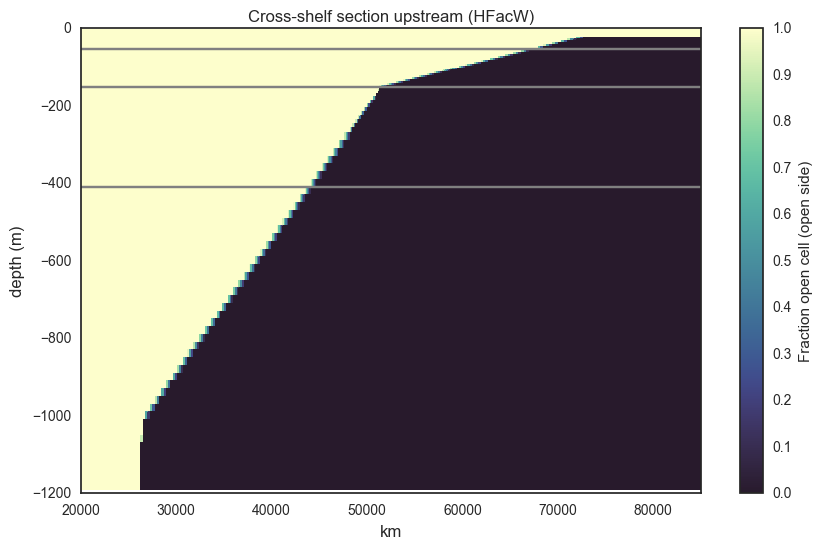

In [18]:
fig,ax = plt.subplots(1,1,figsize=(10,6))

CS = ax.pcolor(grid.Y.isel(Y=slice(50,350)),
               grid.Z.isel(Z=slice(0,90)),
               grid.HFacW.isel(Xp1=50,Z=slice(0,90),Y=slice(50,350)),
               cmap=cmo.cm.deep_r)
cb=plt.colorbar(CS,ax=ax)
cb.set_label('Fraction open cell (open side)')

ax.axhline(grid.Z.isel(Z=10),linestyle='-', color='0.5')
ax.axhline(grid.Z.isel(Z=30),linestyle='-', color='0.5')
ax.axhline(grid.Z.isel(Z=50),linestyle='-', color='0.5')

ax.set_xlim(20000,85000)
ax.set_ylabel('depth (m)',fontsize=12)
ax.set_xlabel('km',fontsize=12)
ax.set_title('Cross-shelf section upstream (HFacW)')

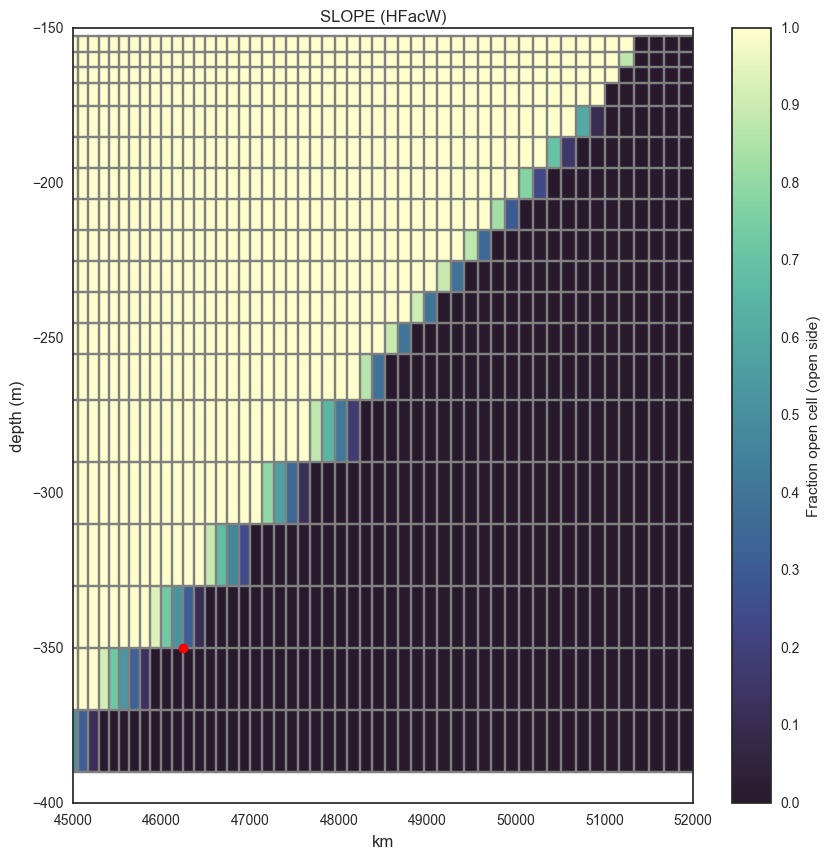

In [19]:
MaskW = rout.getMask(grid_file,'HFacW')

fig,ax = plt.subplots(1,1,figsize=(10,10))

CS = ax.pcolor(grid.Y.isel(Y=slice(175,230)),
               grid.Z.isel(Z=slice(30,50)),
               grid.HFacW.isel(Xp1=50,Z=slice(30,50),Y=slice(175,230)),
               cmap=cmo.cm.deep_r)
cb=plt.colorbar(CS,ax=ax)
cb.set_label('Fraction open cell (open side)')

yz,zz = np.meshgrid(grid.Y.isel(Y=slice(175,230)),grid.Z.isel(Z=slice(30,50)))
ax.plot(yz,zz,color='0.5')

for ii in range(len(zz[:,1])):
    ax.axhline(y=zz[ii,1],linestyle='-', color='0.5')

ax.plot(grid.Y.isel(Y=ys[3]),grid.Z.isel(Z=47),'ro')

ax.set_xlim(45000,52000)
ax.set_ylabel('depth (m)',fontsize=12)
ax.set_xlabel('km',fontsize=12)
ax.set_title('SLOPE (HFacW)')

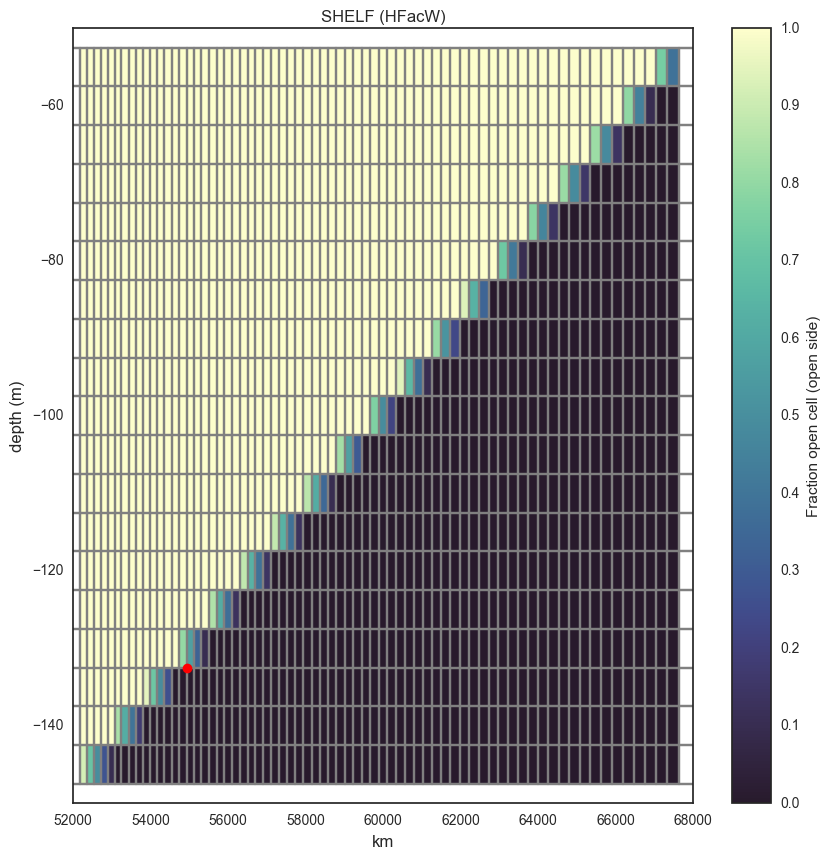

In [20]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

CS = ax.pcolor(grid.Y.isel(Y=slice(230,300)),
               grid.Z.isel(Z=slice(10,30)),
               grid.HFacW.isel(Xp1=50,Z=slice(10,30),Y=slice(230,300)),
               cmap=cmo.cm.deep_r)
cb = plt.colorbar(CS,ax=ax)
cb.set_label('Fraction open cell (open side)')
yz,zz = np.meshgrid(grid.Y.isel(Y=slice(230,300)),grid.Z.isel(Z=slice(10,30)))
ax.plot(yz,zz,color='0.5')


for ii in range(len(zz[:,1])):
    ax.axhline(y=zz[ii,1],linestyle='-', color='0.5')

ax.plot(grid.Y.isel(Y=ys[0]),grid.Z.isel(Z=26),'ro')

ax.set_ylim(-150,-50)
ax.set_ylabel('depth (m)',fontsize=12)
ax.set_xlabel('km',fontsize=12)
ax.set_title('SHELF (HFacW)')

In [21]:
def plot_LBL_with_diff(Ubase,U63,U57,U36,y,ypos):
    ''' 
    INPUT
       Ubase: xarray, Base case U lateral velocity profile at the desired station. Size (nt,size(z))
       U63: xarray,Run 63 lateral velocity profile
       U57: xarray,Run 57 lateral velocity profile
       U36: xarray,Run 36 lateral velocity profile
       y: xarray, cross shelf distance array from grid.Y. Same size as velocity profiles
    RETURN 
      handle for ax1'''
    
    gs = gridspec.GridSpec(2, 3,
                           width_ratios=[2,2,1]
                           )
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax3 = plt.subplot(gs[2])
    ax4 = plt.subplot(gs[3])
    ax5 = plt.subplot(gs[4])
    ax6 = plt.subplot(gs[5])

    for tt in [0,4,8,12,16]:

        ax1.plot(Ubase.isel(T=tt),y/1000.,'o-')
        ax2.plot(U63.isel(T=tt),y/1000.,'o-')
        ax3.plot((Ubase.isel(T=tt).data-U63.isel(T=tt).data)*100.,y/1000.,'-')
        ax4.plot(U57.isel(T=tt),y/1000.,'o-')
        ax5.plot(U36.isel(T=tt),y/1000.,'o-')
        ax6.plot((U57.isel(T=tt).data-U36.isel(T=tt).data)*100.,y/1000.,'-')

        ax1.set_title('Low Kv, low Av (base case)')
        ax1.set_ylabel('Cross-shelf distance (km)')
        ax2.set_title('Low Kv, high Av')
        ax3.set_title('Difference')
        ax4.set_title('High Kv, low Av')
        ax4.set_ylabel('Cross-shelf (km)')
        ax4.set_xlabel('Alongshore velocity (m/s)')
        ax5.set_title('High Kv, high Av')
        ax5.set_xlabel('Alongshore velocity (m/s)')
        ax6.set_title('Difference')
        ax6.set_xlabel('(10$^{-2}$ m/s)')
    
    
    ax1.axhline(y=grid.Y.isel(Y=ypos)/1000,color='0.5')
    ax2.axhline(y=grid.Y.isel(Y=ypos)/1000,color='0.5')
    ax3.axhline(y=grid.Y.isel(Y=ypos)/1000,color='0.5')
    ax4.axhline(y=grid.Y.isel(Y=ypos)/1000,color='0.5')
    ax5.axhline(y=grid.Y.isel(Y=ypos)/1000,color='0.5')
    ax6.axhline(y=grid.Y.isel(Y=ypos)/1000,color='0.5')
    
    ax1.set_ylim(ax1.get_ylim()[::-1])
    ax2.set_ylim(ax2.get_ylim()[::-1])
    ax3.set_ylim(ax3.get_ylim()[::-1])
    ax4.set_ylim(ax4.get_ylim()[::-1])
    ax5.set_ylim(ax5.get_ylim()[::-1])
    ax6.set_ylim(ax6.get_ylim()[::-1])
    return(ax1)


In [22]:
# Load U for upstream stations on slope and shelf
Ulat0 = state_base.U.isel(Xp1=xs[0],Z=26)
Ulat0_36 = state_36.U.isel(Xp1=xs[0],Z=26)
Ulat0_57 = state_57.U.isel(Xp1=xs[0],Z=26)
Ulat0_63 = state_highKv.U.isel(Xp1=xs[0],Z=26)

Ulat3 = state_base.U.isel(Xp1=xs[3],Z=47)
Ulat3_36 = state_36.U.isel(Xp1=xs[3],Z=47)
Ulat3_57 = state_57.U.isel(Xp1=xs[3],Z=47)
Ulat3_63 = state_highKv.U.isel(Xp1=xs[3],Z=47)

Lighter blue means later in time. Times are days 0, 2, 4, 6, 8


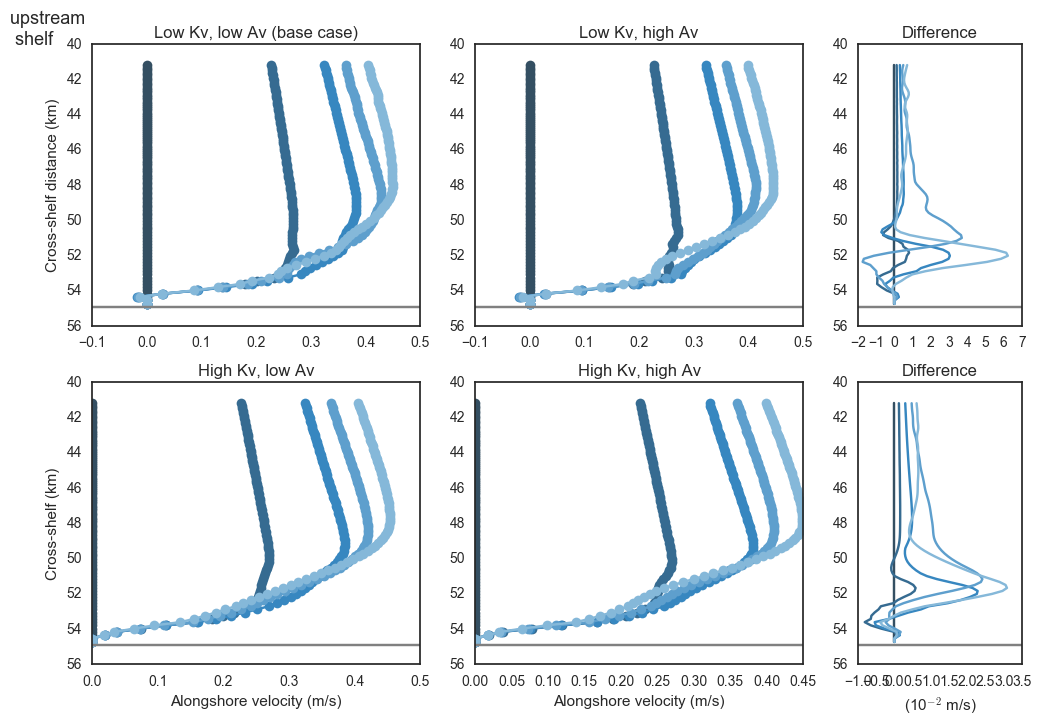

In [23]:
print('Lighter blue means later in time. Times are days 0, 2, 4, 6, 8')

fig = plt.figure(figsize=(12,8))

sns.set_palette('Blues_d',5)

ax1=plot_LBL_with_diff(Ulat0.isel(Y=slice(150,ys[0])),
                       Ulat0_63.isel(Y=slice(150,ys[0])),
                       Ulat0_57.isel(Y=slice(150,ys[0])),
                       Ulat0_36.isel(Y=slice(150,ys[0])),
                       grid.Y.isel(Y=slice(150,ys[0])),
                      ys[0])
    
ax1.text(-0.25, 40, 'upstream \n shelf', fontsize=13)
        
plt.show()

Lighter blue means later in time. Times are days 0, 2, 4, 6, 8


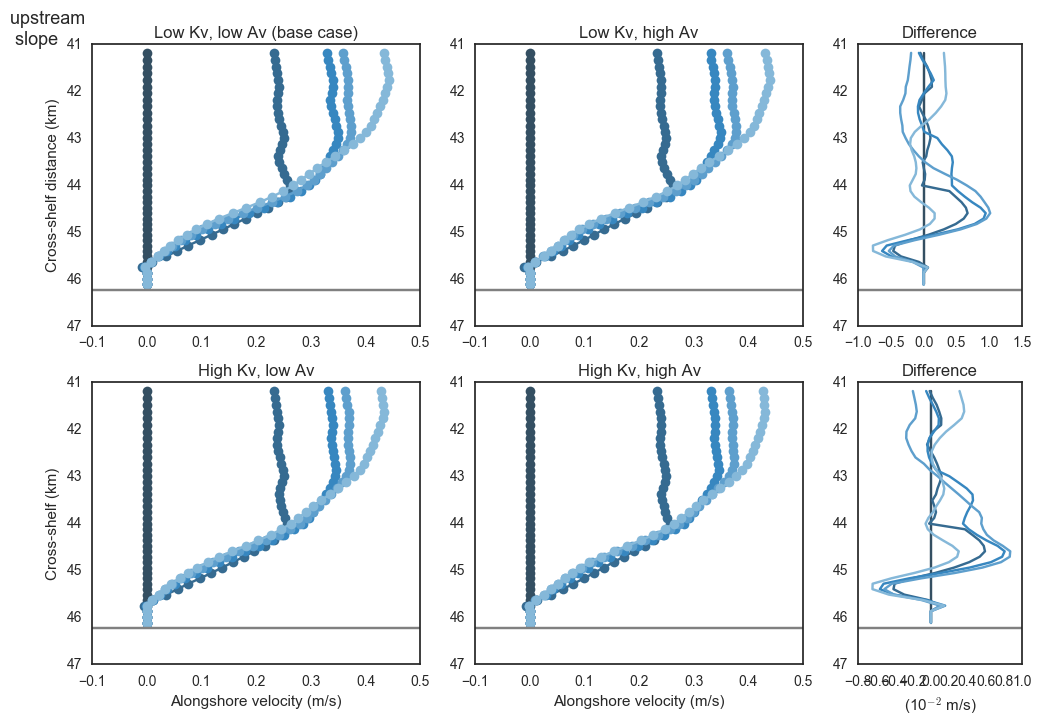

In [24]:
print('Lighter blue means later in time. Times are days 0, 2, 4, 6, 8')

fig = plt.figure(figsize=(12,8))

sns.set_palette('Blues_d',5)

ax1=plot_LBL_with_diff(Ulat3.isel(Y=slice(150,ys[3])),
                       Ulat3_63.isel(Y=slice(150,ys[3])),
                       Ulat3_57.isel(Y=slice(150,ys[3])),
                       Ulat3_36.isel(Y=slice(150,ys[3])),
                       grid.Y.isel(Y=slice(150,ys[3])),
                      ys[3])
    
ax1.text(-0.25, 41, 'upstream \n slope', fontsize=13)
        
plt.show()